In [1]:
from IPython.display import display, HTML
display(HTML('<center><img src="nbalogo.png" width="100"/></center>'))

<h1 style="text-align:center;">Introduction</h1>

<p style="text-align:center;">The NBA's scoring landscape has transformed dramatically over its nearly century-long history. At the heart of this evolution lies one of the most significant rule changes in basketball history: the introduction of the 3-point line in the 1979-80 season. What began as an experimental addition has revolutionized how the game is played, coached, and won. Through this analysis, we'll explore how scoring patterns have shifted over time, using the 3-point shot as our primary lens. Finally, we'll use our understanding of modern NBA scoring patterns to build a predictive model that can forecast game outcomes based on team statistics.</p>

<h2 style="text-align:center;">Glossary</h2>
<p style="text-align:center;">3-point shot: A shot that is taken from beyond the 3-point arc.</p>
<p style="text-align:center;">fg3a_home/away: 3-point field goal attempts by the home/away team</p>
<p style="text-align:center;">fg3m_home/away: 3-point field goals made by the home/away team</p>
<p style="text-align:center;">fga_home/away: 2-point field goal attempts by the home/away team</p>
<p style="text-align:center;">fgm_home/away: 2-point field goals made by the home/away team</p>

<p style="text-align:center;">For some context: If you see a '2' before the year in the season_id column, that means that the game took place during the regular season, and if you see a '4' that means that the game took place during the playoffs. (The prefixes '1' and '3' are for preseason games and all-star games, respectively, which we won't be examining in our analysis.)</p>

# Viewing the Dataset

Throughout this notebook, we'll be using a detailed (and actively updated) dataset of every NBA game that includes statistics for both home and away teams. The dataset spans several decades and provides information on shooting performance, team points, and more. 

I wanted to do a project on basketball because I've recently been getting more interested in the sport, and more specifically in the statistics side of it. This also seems like a great way to get familiar with the strategy behind the game and the history that I may not be exposed to without a dataset like this. 

I decided on this specific dataset because it captures how the game has evolved over time, making it ideal for studying changes in NBA scoring. More specifically, we’ll analyze trends in 3-point shooting across seasons and observe its impact on team performance and winning outcomes.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
rawdf = pd.read_csv('game.csv')
rawdf

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,NaN,NaN,NaN,NaN,NaN,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,50.0,17,0,Regular Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65693,42022,1610612748,MIA,Miami Heat,42200403,2023-06-07 00:00:00,MIA vs. DEN,L,240,34.0,...,58.0,28.0,3.0,5.0,14.0,18.0,109.0,15,1,Playoffs
65694,42022,1610612748,MIA,Miami Heat,42200404,2023-06-09 00:00:00,MIA vs. DEN,L,240,35.0,...,34.0,26.0,11.0,7.0,8.0,18.0,108.0,13,1,Playoffs
65695,42022,1610612743,DEN,Denver Nuggets,42200405,2023-06-12 00:00:00,DEN vs. MIA,W,240,38.0,...,44.0,18.0,9.0,7.0,8.0,21.0,89.0,-5,1,Playoffs
65696,32022,1610616834,LBN,Team LeBron,32200001,2023-02-19 00:00:00,LBN vs. GNS,L,221,79.0,...,46.0,43.0,8.0,1.0,12.0,2.0,184.0,9,1,All-Star


In [4]:
rawdf.describe()

,season_id,team_id_home,game_id,min,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,...,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away
count,65698.000000,6.569800e+04,6.569800e+04,65698.000000,65685.000000,50251.000000,50208.000000,52480.000000,47015.000000,46624.000000,...,46700.000000,49973.000000,49897.000000,46849.000000,47073.000000,47013.000000,62847.000000,65698.000000,65698.000000,65698.000000
mean,22949.338747,1.609926e+09,2.584747e+07,221.003486,39.672269,83.992796,0.467321,5.735099,17.741146,0.346136,...,30.238073,42.119645,22.135419,7.854148,4.681537,15.199860,23.097284,100.991567,-3.627569,0.201330
std,5000.305500,3.324313e+07,6.303760e+06,67.903521,6.770802,9.164445,0.059423,4.537337,10.545810,0.151234,...,5.588675,6.867396,5.380805,3.031766,2.500820,4.299798,5.227208,14.418755,13.091395,0.400997
min,12005.000000,4.500000e+01,1.050000e+07,0.000000,4.000000,0.000000,0.140000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,-73.000000,0.000000
25%,21981.000000,1.610613e+09,2.130053e+07,240.000000,35.000000,78.000000,0.427000,2.000000,10.000000,0.261000,...,26.000000,37.000000,18.000000,6.000000,3.000000,12.000000,20.000000,92.000000,-12.000000,0.000000
50%,21997.000000,1.610613e+09,2.630007e+07,240.000000,40.000000,84.000000,0.467000,5.000000,16.000000,0.348000,...,30.000000,42.000000,22.000000,8.000000,4.000000,15.000000,23.000000,101.000000,-4.000000,0.000000
75%,22011.000000,1.610613e+09,2.880069e+07,240.000000,44.000000,89.000000,0.506000,9.000000,24.000000,0.429750,...,34.000000,47.000000,26.000000,10.000000,6.000000,18.000000,26.000000,110.000000,5.000000,0.000000
max,42022.000000,1.610617e+09,4.980009e+07,365.000000,84.000000,240.000000,0.697000,28.000000,77.000000,1.000000,...,60.000000,90.000000,89.000000,27.000000,19.000000,40.000000,115.000000,196.000000,68.000000,1.000000


##### Let's start out by getting familiar with our dataset.

In [5]:
rawdf.shape

(65698, 55)

We can see that there are 65698 rows and 55 columns in our dataset, representing 65698 games and 55 different statistics recorded for each game.

Next, let's look at the scoring statistics for both home and away teams.

In [6]:
rawdf[['pts_home', 'pts_away']].describe()

,pts_home,pts_away
count,65698.000000,65698.000000
mean,104.619136,100.991567
std,14.757924,14.418755
min,18.000000,19.000000
25%,95.000000,92.000000
50%,105.000000,101.000000
75%,114.000000,110.000000
max,192.000000,196.000000


We can already make some conclusions about the NBA! As we can observe, the home team scores 3.628 points more than the away team on average (104.619 vs. 100.992). This is most likely due to the fact that the home team has the home court advantage.

Next, let's look at the distribution of the season types.

In [7]:
rawdf['season_type'].value_counts()

season_type
Regular Season    60192
Playoffs           3842
Pre Season         1536
All Star             65
All-Star             63
Name: count, dtype: int64

We can see that the dataset includes rows for pre season, regular season, playoff, and even all-star games! We can obvserve that the majority of the games are regular season games, making up 60192 rows of the dataset.

##### Now, let's get into our main question: How has the 3-point shot evolved over time?

First, we have to filter the data. The dataset includes rows for all-star and preseason games, which we don't want to include in our analysis. Players tend to take these games less seriously and throw up more 3-point shots, potentially skewing the data. We also have to remove any rows where the 3-point shot attempts are 0 or NaN (all of the data before the 3-point shot was introduced).

In [8]:
pd.set_option('display.max_columns', None) 

In [9]:
df = rawdf.dropna(subset=['fg3m_home', 'fg3m_away', 'fg3a_home', 'fg3a_away'])
df = df[df['season_type'].isin(['Regular Season', 'Playoffs'])]
df

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,dreb_home,reb_home,ast_home,stl_home,blk_home,tov_home,pf_home,pts_home,plus_minus_home,video_available_home,team_id_away,team_abbreviation_away,team_name_away,matchup_away,wl_away,fgm_away,fga_away,fg_pct_away,fg3m_away,fg3a_away,fg3_pct_away,ftm_away,fta_away,ft_pct_away,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
468,21947,1610610034,BOM,St. Louis Bombers,24700120,1948-01-31 00:00:00,BOM vs. PHW,L,0,20.0,87.0,0.230,0.0,0.0,NaN,20.0,24.0,0.833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,60.0,-6,0,1610612744,PHW,Philadelphia Warriors,PHW @ BOM,W,23.0,91.0,0.253,0.0,0.0,NaN,20.0,27.0,0.741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,66.0,6,0,Regular Season
4702,21959,1610612737,STL,St. Louis Hawks,25900187,1960-01-24 00:00:00,STL vs. NYK,W,0,59.0,116.0,0.509,0.0,0.0,NaN,37.0,46.0,0.804,NaN,NaN,56.0,NaN,NaN,NaN,NaN,25.0,155.0,26,0,1610612752,NYK,New York Knicks,NYK @ STL,L,51.0,108.0,0.472,0.0,0.0,NaN,27.0,34.0,0.794,NaN,NaN,49.0,NaN,NaN,NaN,NaN,32.0,129.0,-26,0,Regular Season
14165,41979,1610612747,LAL,Los Angeles Lakers,47900043,1980-05-04 00:00:00,LAL vs. PHL,W,240,48.0,89.0,0.539,0.0,0.0,NaN,13.0,15.0,0.867,12.0,31.0,43.0,30.0,5.0,9.0,17.0,24.0,109.0,7,0,1610612755,PHL,Philadelphia 76ers,PHL @ LAL,L,40.0,90.0,0.444,0.0,2.0,0.000,22.0,28.0,0.786,14.0,26.0,40.0,28.0,12.0,13.0,14.0,17.0,102.0,-7,0,Playoffs
14166,41979,1610612747,LAL,Los Angeles Lakers,47900044,1980-05-07 00:00:00,LAL vs. PHL,L,240,48.0,95.0,0.505,0.0,1.0,0.000,8.0,12.0,0.667,15.0,37.0,52.0,32.0,12.0,7.0,26.0,27.0,104.0,-3,0,1610612755,PHL,Philadelphia 76ers,PHL @ LAL,W,43.0,85.0,0.506,0.0,1.0,0.000,21.0,27.0,0.778,5.0,29.0,34.0,34.0,14.0,11.0,20.0,21.0,107.0,3,0,Playoffs
14167,41979,1610612755,PHL,Philadelphia 76ers,47900045,1980-05-10 00:00:00,PHL vs. LAL,L,240,45.0,93.0,0.484,1.0,4.0,0.250,10.0,17.0,0.588,13.0,24.0,37.0,34.0,12.0,8.0,13.0,25.0,101.0,-10,0,1610612747,LAL,Los Angeles Lakers,LAL @ PHL,W,44.0,92.0,0.478,0.0,1.0,0.000,23.0,30.0,0.767,22.0,34.0,56.0,20.0,5.0,5.0,20.0,25.0,111.0,10,0,Playoffs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65691,42022,1610612743,DEN,Denver Nuggets,42200401,2023-06-01 00:00:00,DEN vs. MIA,W,240,40.0,79.0,0.506,8.0,27.0,0.296,16.0,20.0,0.800,6.0,39.0,45.0,29.0,4.0,4.0,10.0,8.0,104.0,11,1,1610612748,MIA,Miami Heat,MIA @ DEN,L,39.0,96.0,0.406,13.0,39.0,0.333,2.0,2.0,1.000,11.0,32.0,43.0,26.0,5.0,4.0,8.0,15.0,93.0,-11,1,Playoffs
65692,42022,1610612743,DEN,Denver Nuggets,42200402,2023-06-04 00:00:00,DEN vs. MIA,L,240,39.0,75.0,0.520,11.0,28.0,0.393,19.0,22.0,0.864,9.0,29.0,38.0,23.0,7.0,2.0,14.0,21.0,108.0,-3,1,1610612748,MIA,Miami Heat,MIA @ DEN,W,38.0,78.0,0.487,17.0,35.0,0.486,18.0,20.0,0.900,8.0,23.0,31.0,28.0,5.0,4.0,11.0,22.0,111.0,3,1,Playoffs
65693,42022,1610612748,MIA,Miami Heat,42200403,2023-06-07 00:00:00,MIA vs. DEN,L,240,34.0,92.0,0.370,11.0,35.0,0.314,15.0,19.0,0.789,10.0,23.0,33.0,20.0,7.0,3.0,4.0,22.0,94.0,-15,1,1610612743,DEN,Denver Nuggets,DEN @ MIA,W,41.0,80.0,0.513,5.0,18.0,0.278,22.0,27.0,0.815,13.0,45.0,58.0,28.0,3.0,5.0,14.0,18.0,109.0,15,1,Playoffs
65694,42022,1610612748,MIA,Miami Heat,42200404,2023-06-09 00:00:00,MIA vs. DEN,L,240,35.0,78.0,0.449,8.0,25.0,0.320,17.0,20.0,0.850,8.0,29.0,37.0,23.0,2.0,3.0,15.0,19.0,95.0,-13,1,1610612743,DEN,Denver Nuggets,DEN @ MIA,W,39.0,79.0,0.494,14.0,28.0,0.500,16.0,21.0,0.762,5.0,29.0,34.0,26.0,11.0,7.0,8.0,18.0,108.0,13,1,Playoffs


Now let's look at the average 3-point attempts and makes per game by season. We'll also perform a string splice on the season_id column to extract the year of the season. If we didn't do this, our dataframe would have two entries for each year, one for the regular season and one for the playoffs. For this analysis, we want to include both as one year.

In [10]:
pd.set_option('display.max_rows', 100)
yeardf = df.assign(season_year = df['season_id'].astype(str).str[1:5])
yeardf = yeardf[yeardf['season_year'].astype(int) >= 1979]
season_stats = yeardf.groupby('season_year').agg({'fg3a_home': 'mean', 'fg3a_away': 'mean', 'fg3m_home': 'mean', 'fg3m_away': 'mean'})
season_stats.reset_index()

,season_year,fg3a_home,fg3a_away,fg3m_home,fg3m_away
0,1979,1.833333,1.500000,0.166667,0.000000
1,1980,2.166667,2.500000,0.166667,0.833333
2,1981,2.301471,2.220588,0.647059,0.566176
3,1982,2.137255,2.421569,0.470588,0.578431
4,1983,2.127660,2.138298,0.489362,0.574468
5,1984,3.476190,3.714286,0.979592,0.959184
6,1985,3.067260,3.732938,0.901088,1.040554
7,1986,4.490138,5.047337,1.396450,1.490138
8,1987,4.856305,5.252199,1.584555,1.609971
9,1988,6.625575,6.835327,2.175713,2.156394


As we can see, the average 3-point attempts and makes per game have been steadily increasing over time. Now let's calculate the 3-points made percentage for each season (accuracy).

In [11]:
season_stats['avg_3ptm_percentage'] = (season_stats['fg3m_home'] + season_stats['fg3m_away']) / (season_stats['fg3a_home'] + season_stats['fg3a_away']) * 100
season_stats

,fg3a_home,fg3a_away,fg3m_home,fg3m_away,avg_3ptm_percentage
season_year,,,,,
1979,1.833333,1.500000,0.166667,0.000000,5.000000
1980,2.166667,2.500000,0.166667,0.833333,21.428571
1981,2.301471,2.220588,0.647059,0.566176,26.829268
1982,2.137255,2.421569,0.470588,0.578431,23.010753
1983,2.127660,2.138298,0.489362,0.574468,24.937656
1984,3.476190,3.714286,0.979592,0.959184,26.963103
1985,3.067260,3.732938,0.901088,1.040554,28.552727
1986,4.490138,5.047337,1.396450,1.490138,30.265743
1987,4.856305,5.252199,1.584555,1.609971,31.602360


Pretty cool! We can observe that the 3-points made percentage has also been steadily increasing over time, indicating that not only is the 3-point shot becoming more popular, but players are getting better and better at shooting it. But this is only half of the picture. To find how truly significant the shot is, let's look at the percentage of points scored by 3-point shots over time compared to overall points scored per season.

In [12]:
season_stats['points_from_3pt'] = (season_stats['fg3m_home'] + season_stats['fg3m_away']) * 3

points_by_season = yeardf.groupby('season_year').agg({'pts_home': 'mean', 'pts_away': 'mean'})
season_stats['total_points'] = points_by_season['pts_home'] + points_by_season['pts_away']

season_stats['3pt%_of_total'] = (season_stats['points_from_3pt'] / season_stats['total_points']) * 100

result = pd.DataFrame(season_stats[['points_from_3pt', 'total_points', '3pt%_of_total']])
result = result.reset_index()
result = result.sort_values(by='season_year', ascending=True)
result

,season_year,points_from_3pt,total_points,3pt%_of_total
0,1979,0.500000,213.666667,0.234009
1,1980,3.000000,183.166667,1.637853
2,1981,3.639706,217.470588,1.673654
3,1982,3.147059,215.647059,1.459356
4,1983,3.191489,215.297872,1.482360
5,1984,5.816327,225.170068,2.583082
6,1985,5.824926,220.506429,2.641613
7,1986,8.659763,219.936884,3.937386
8,1987,9.583578,215.722385,4.442551
9,1988,12.996320,217.847286,5.965794


As we can see, the percentage of points scored from 3-point shots as a proportion of the total points scored has also been steadily increasing over time, making up around a third of all points scored in 2022. With all of these metrics combined, we can see that the 3-point shot is being taken more, made more, and is contributing more to the game as time goes on.

# Data Visualizations

##### Now let's look at some visualizations to see how the 3-point shot has evolved over time.

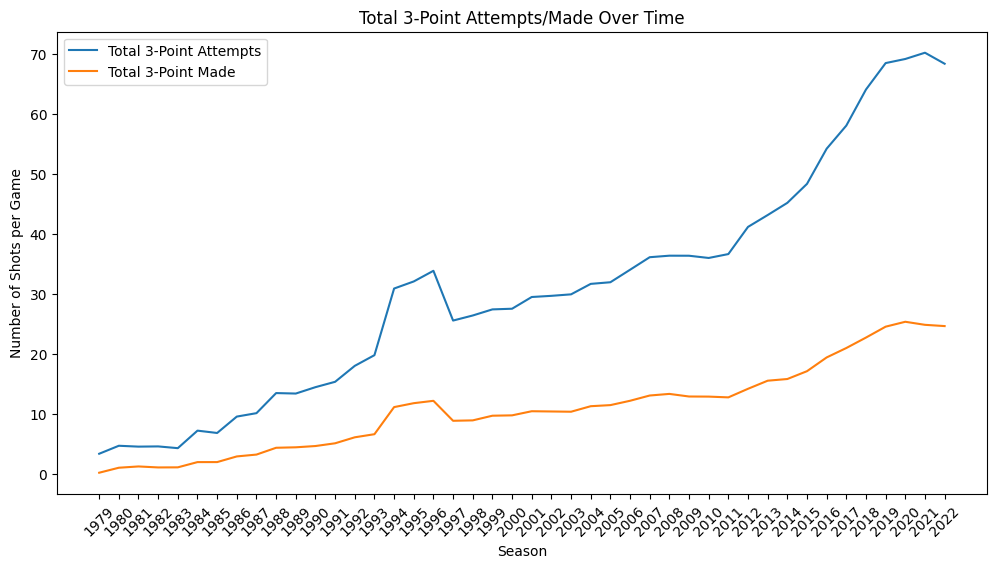

In [13]:
season_stats = season_stats.reset_index()

plt.figure(figsize=(12,6))
plt.plot(season_stats['season_year'], (season_stats['fg3a_home'] + season_stats['fg3a_away']), label='Total 3-Point Attempts')
plt.plot(season_stats['season_year'], (season_stats['fg3m_home'] + season_stats['fg3m_away']), label='Total 3-Point Made')

plt.title('Total 3-Point Attempts/Made Over Time')
plt.xlabel('Season')
plt.ylabel('Number of Shots per Game')
plt.legend()

plt.xticks(rotation=45)
plt.show()

What does the league's 3-point shooting accuracy percentage look like over time?

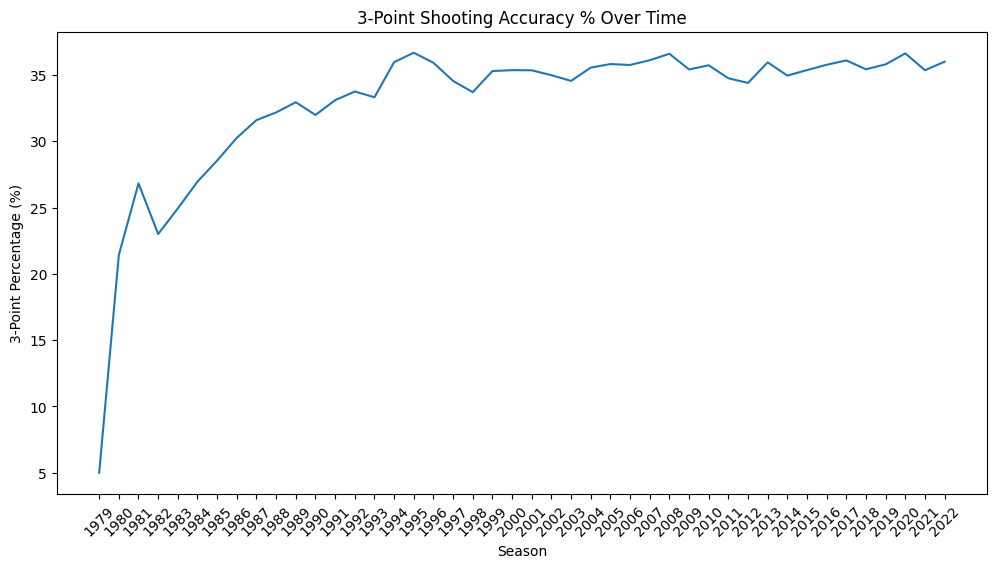

In [14]:
plt.figure(figsize=(12,6))
plt.plot(season_stats['season_year'], season_stats['avg_3ptm_percentage'])

plt.title('3-Point Shooting Accuracy % Over Time')
plt.xlabel('Season')
plt.ylabel('3-Point Percentage (%)')

plt.xticks(rotation=45)
plt.show()

What does the proportion look like of points scored from 3-point shots compared to 2-point shots over time?

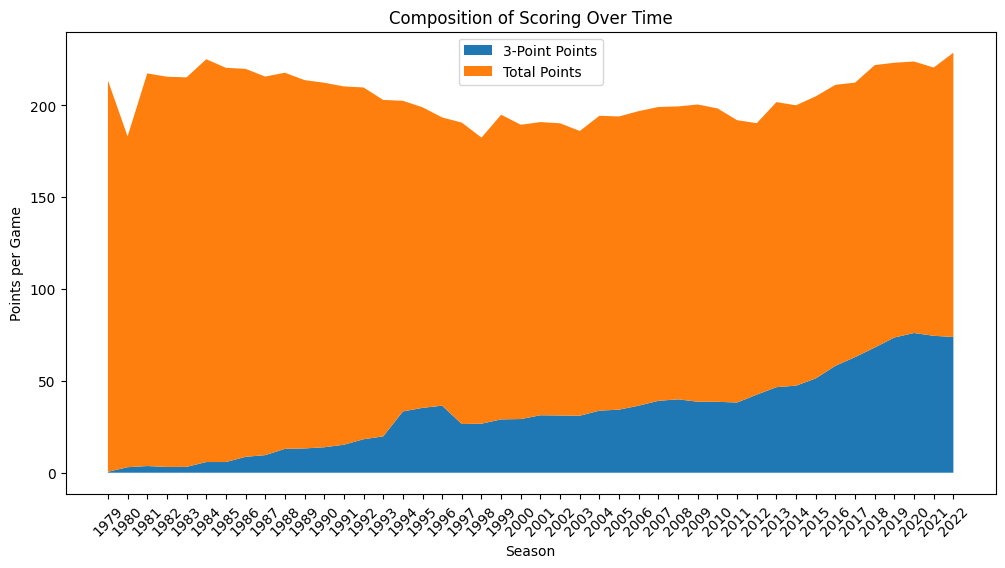

In [15]:
plt.figure(figsize=(12,6))
plt.fill_between(season_stats['season_year'], season_stats['points_from_3pt'], label='3-Point Points')
plt.fill_between(season_stats['season_year'], season_stats['total_points'], season_stats['points_from_3pt'], label='Total Points')

plt.title('Composition of Scoring Over Time')
plt.xlabel('Season')
plt.ylabel('Points per Game')
plt.legend()

plt.xticks(rotation=45)
plt.show()

Over the course of this analysis, we explored the evolution of the 3-point shot in the NBA. We observed that the 3-point shot has become more popular, ultimately amounting to around a third of all points scored in today's NBA, compared to ~1 percent when the shot was introduced. We also observed that the accuracy of the shot has increased over time, going from ~21% to ~36% over the past decades. 

Next, let's apply our knowledge and make some predictions!

# Building a Game Prediction Model

So far, we've only focused on one aspect of the game - the 3-point shot. Now, let's broaden our horizons and explore what we can determine based on a few more metrics.

For the final section of this notebook, we'll build a machine learning model to predict NBA game outcomes based on team statistics. We'll use the 2022 season data to train a Random Forest Classifier that can predict which team is likely to win in a head-to-head matchup.

The model will consider a few key statistics for each team:
- Points per game (PPG)
- Field goal percentage (FG%)
- Rebounds per game
- Assists per game

### Data Preparation and Model Training

First, we'll prepare our data by:
1. Calculating season averages for each team
2. Creating feature vectors for each game
3. Splitting the data into training and test sets
4. Scaling the features for better model performance

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

season_df = df[(df['season_id'] == 22022)]

def prepare_game_data(season_df):
    features = []
    outcomes = []
    
    teams = season_df['team_abbreviation_home'].unique()
    team_stats = {}
    
    for team in teams:
        home_games = season_df[season_df['team_abbreviation_home'] == team]
        away_games = season_df[season_df['team_abbreviation_away'] == team]
        
        team_stats[team] = {
            'ppg': (home_games['pts_home'].mean() + away_games['pts_away'].mean()) / 2,
            'fg_pct': ((home_games['fgm_home'].sum() + away_games['fgm_away'].sum()) / (home_games['fga_home'].sum() + away_games['fga_away'].sum())),
            'reb': (home_games['reb_home'].mean() + away_games['reb_away'].mean()) / 2,
            'ast': (home_games['ast_home'].mean() + away_games['ast_away'].mean()) / 2
        }
    
    game_list = season_df.to_dict('records')

    for game in game_list:
        home_team = game['team_abbreviation_home']
        away_team = game['team_abbreviation_away']
        
        game_features = [
            team_stats[home_team]['ppg'],
            team_stats[away_team]['ppg'],
            team_stats[home_team]['fg_pct'],
            team_stats[away_team]['fg_pct'],
            team_stats[home_team]['reb'],
            team_stats[away_team]['reb'],
            team_stats[home_team]['ast'],
            team_stats[away_team]['ast']
        ]
        
        features.append(game_features)
        if game['pts_home'] > game['pts_away']:
            outcomes.append(1)
        else:
            outcomes.append(0)
    
    return np.array(features), np.array(outcomes)

### Model Training and Scaling

We'll use scikit-learn's RandomForestClassifier with:
- 100 decision trees
- Standard scaling of features
- 80/20 train/test split

In [17]:
X, y = prepare_game_data(season_df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

### Prediction Interface

To make the model useful, we'll create functions to:
1. Look up team statistics
2. Format and display team comparisons
3. Generate win probability predictions

In [18]:
def get_team_season_stats(team_abbr):
    home_games = season_df[season_df['team_abbreviation_home'] == team_abbr]
    away_games = season_df[season_df['team_abbreviation_away'] == team_abbr]
    
    stats = {
        'Points Per Game': (home_games['pts_home'].mean() + away_games['pts_away'].mean()) / 2,
        'FG%': ((home_games['fgm_home'].sum() + away_games['fgm_away'].sum()) / (home_games['fga_home'].sum() + away_games['fga_away'].sum())) * 100,
        'Rebounds Per Game': (home_games['reb_home'].mean() + away_games['reb_away'].mean()) / 2,
        'Assists Per Game': (home_games['ast_home'].mean() + away_games['ast_away'].mean()) / 2
    }
    return stats

def predict_matchup(team1, team2):
    team1_stats = get_team_season_stats(team1)
    team2_stats = get_team_season_stats(team2)
    
    print(f"\n=== 2022 Season Stats ===")
    print(f"{'Metric':<20} {team1:<10} {team2:<10}")
    print("-" * 40)
    for metric in team1_stats.keys():
        print(f"{metric:<20} {team1_stats[metric]:>10.1f} {team2_stats[metric]:>10.1f}")
    
    game_features = [
        team1_stats['Points Per Game'],
        team2_stats['Points Per Game'],
        team1_stats['FG%'] / 100,
        team2_stats['FG%'] / 100,
        team1_stats['Rebounds Per Game'],
        team2_stats['Rebounds Per Game'],
        team1_stats['Assists Per Game'],
        team2_stats['Assists Per Game']
    ]
    
    game_features_scaled = scaler.transform([game_features])
    win_prob = model.predict_proba(game_features_scaled)[0][1]
    
    return win_prob

### Using the Model

The final interface allows users to:
1. View available team abbreviations
2. Input two teams for comparison
3. See their season statistics side-by-side
4. Get a predicted probability of each team winning

In [19]:
available_teams = sorted(season_df['team_abbreviation_home'].unique())
print("\nAvailable teams:", available_teams)

team1 = input("\nEnter home team abbreviation: ")
team2 = input("Enter away team abbreviation: ")

prob = predict_matchup(team1, team2)
print(f"\nBased on 2022 regular season performance:")
print(f"Probability of {team1} (home) beating {team2}: {prob:.1%}")
print(f"Probability of {team2} winning: {(1-prob):.1%}")

y_pred = model.predict(X_test_scaled)
print(f"\nModel Accuracy: {accuracy_score(y_test, y_pred):.1%}")


Available teams: ['ATL', 'BKN', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS']

=== 2022 Season Stats ===
Metric               CHA        DET       
----------------------------------------
Points Per Game           111.0      110.3
FG%                        45.7       45.4
Rebounds Per Game          44.5       42.4
Assists Per Game           25.1       23.0

Based on 2022 regular season performance:
Probability of CHA (home) beating DET: 52.0%
Probability of DET winning: 48.0%

Model Accuracy: 60.6%


The model achieves reasonable accuracy considering the unpredictability of NBA games, and provides an interesting way to compare teams based on their season performance.

Data retrieved from: https://www.kaggle.com/datasets/wyattowalsh/basketball/code?datasetId=1218020&sortBy=voteCount

Image credit: https://cdn.freebiesupply.com/images/large/2x/nba-logo-transparent.png